In [144]:
import pandas as pd
# 超参数
COLS_Y = '百位奇偶'
COLS_Y_CLASSNAME = ["百位偶数", "百位奇数"]
COLS_ALL = ['期号', '开奖号码', '号码1','号码1奇偶','号码2','号码2奇偶','号码3','号码3奇偶','跨度','和值','百位奇偶']

# 读取excel文件并获取指定列
df = pd.read_excel('Data\福彩3D历史开奖.xlsx', usecols=COLS_ALL)

print(df.head(10))

        期号  号码1  号码1奇偶  号码2  号码2奇偶  号码3  号码3奇偶  开奖号码 百位奇偶  跨度  和值
0  2024144    8      0    1      1    6      0   816   偶数   7  15
1  2024143    9      1    5      1    5      1   955   偶数   4  19
2  2024142    8      0    1      1    3      1   813   奇数   7  12
3  2024141    2      0    5      1    6      0   256   偶数   4  13
4  2024140    5      1    3      1    6      0   536   偶数   3  14
5  2024139    7      1    4      0    8      0   748   奇数   4  19
6  2024138    9      1    5      1    5      1   955   奇数   4  19
7  2024137    9      1    8      0    2      0   982   奇数   7  19
8  2024136    2      0    2      0    7      1   227   奇数   5  11
9  2024135    0      0    3      1    5      1    35   偶数   5   8


In [145]:
from sklearn.model_selection import train_test_split

## 取需要训练的值
cols_x = df.drop(columns=COLS_Y)
cols_y = df[COLS_Y]
cols_x_names = cols_x.columns.tolist()

Xtrain, Xtest, Ytrain, ytest = train_test_split(cols_x,cols_y,test_size=0.2, random_state=180) 

print(Xtrain.shape)
print(Xtest.shape)



(3144, 10)
(786, 10)


In [146]:
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score


# 训练模型
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=7,min_samples_leaf=4)  #最大{max_depth}层，最少也需要{lefa}个样本才生成分支
clf = clf.fit(Xtrain, Ytrain) 

# 预测测试集
y_pred = clf.predict(Xtest)




# 评估模型
print("Accuracy:", accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred))


#print('精准度： '+str(clf.score(Xtest, ytest))) #返回预测的准确度
#print([*zip(feature_name,clf.feature_importances_)]) #返回决策树各自变量的重要程度

Accuracy: 0.49745547073791346
              precision    recall  f1-score   support

          偶数       0.49      0.81      0.61       385
          奇数       0.52      0.20      0.29       401

    accuracy                           0.50       786
   macro avg       0.51      0.50      0.45       786
weighted avg       0.51      0.50      0.45       786



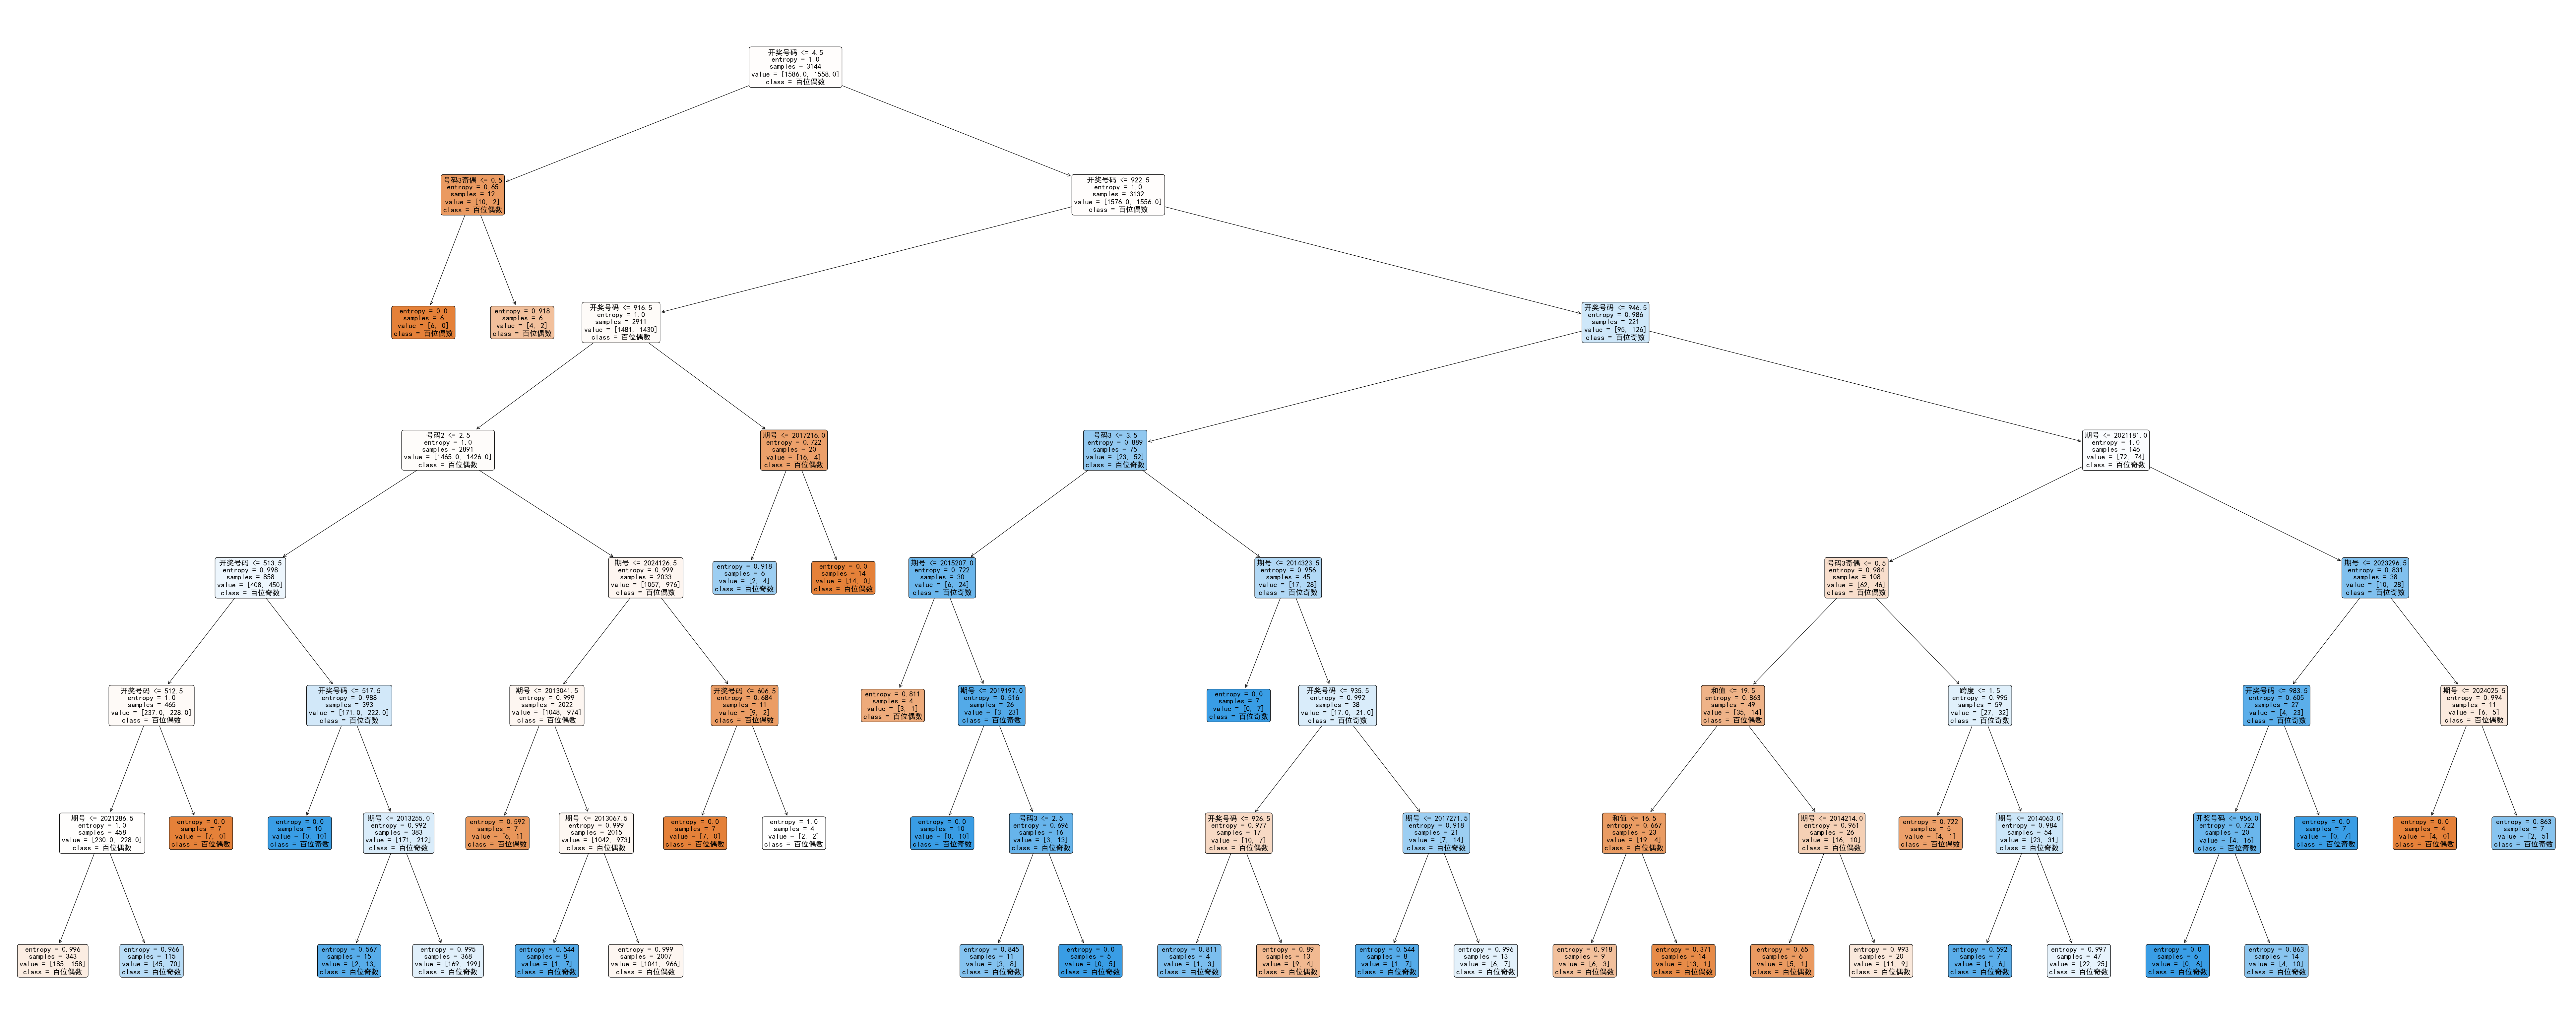

Ytrain unique: ['偶数' '奇数']


In [153]:
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif']=['Simhei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(100,40)) #画布大小，要大一点防止画不下
a = tree.plot_tree(clf,
                   feature_names = cols_x_names,
                   #class_names=COLS_Y_CLASSNAME, 
                   class_names=['百位偶数','百位奇数'], 
                   rounded = True,
                   filled = True,
                   fontsize=16)

plt.show()  

print("Ytrain unique:", Ytrain.unique())

